# Time Varying mass func
## The nonlocal breather

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

### Idea is to follow the Nov 1 2021 work where i used energy density to get a guess at a vacuum breather.

### Make time tick regular, waves get longer - example cos w (t - r/y*r/c) or similar, y is the length



![alt-text](img/schwarschild.png "Schwarschild coords")


In [2]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w, v, R0 = sympy.symbols("G M F a w v R0")
a = M*(1 - F*sin(w*(syms[0] - R0*ln(syms[1])/v)))

mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -mT*mT/(v*v*mR*mR)/(1 - 2*a/syms[1])

#list2d[0][0] = -1/(v*v)*1/(1 - 2*a/syms[1])

list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()



-F*M*w*cos(w*(-R0*log(r)/v + t))
F*M*R0*w*cos(w*(-R0*log(r)/v + t))/(r*v)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡                         2                                                                                      ⎤
⎢                       -r                                                                                       ⎥
⎢──────────────────────────────────────────────────                       0                        0       0     ⎥
⎢    ⎛      ⎛       ⎛  ⎛  R₀⋅log(r)    ⎞⎞    ⎞    ⎞                                                              ⎥
⎢    ⎜  2⋅M⋅⎜- F⋅sin⎜w⋅⎜- ───────── + t⎟⎟ + 1⎟    ⎟                                                              ⎥
⎢  2 ⎜      ⎝       ⎝  ⎝      v        ⎠⎠    ⎠    ⎟                                                              ⎥
⎢R₀ ⋅⎜- ────────────────────────────────────── + 1⎟                                                              ⎥
⎢    ⎝                    r                       ⎠                                                              ⎥
⎢                                                                               

(t, r, theta, phi, F, M, R0, v, w)


Text(0.5, 1.0, 'g_ab')

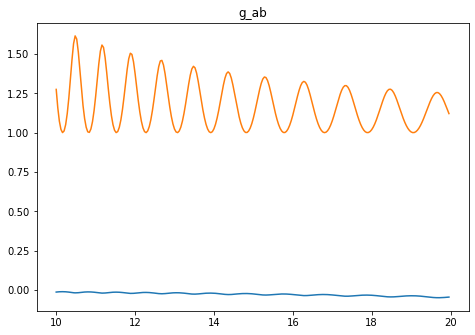

In [3]:
###Plot something
# first make the tensor into a function, printing 
args2, func2 = sch.tensor_lambdify()
print(args2) # these are the argument values 

v = 1

theta = 1
R0 = 100.0

#Make x values - which we will sub in for r 
x = np.arange(10.0, 20.0, 0.04)
func2(0.5,x,0, 0, 1, 1, R0, v, 1)[0][0]

# Call the functions
tt = func2(1.0,x,theta, 1, 1, 1, R0, v, 1)[0][0]

tr = func2(1.0,x,theta, 1, 1, 1, R0, v, 1)[0][1]

rr = func2(1.0,x,theta, 1, 1, 1, R0, v, 1)[1][1] 

hh = func2(1.0,x,theta, 1, 1, 1, R0, v, 1)[2][2]/(x*x)

pp = func2(1.0,x,theta, 1, 1, 1, R0, v, 1)[3][3]/(x*x*sin(theta)*sin(theta))


fig2=plt.figure()
ax2=fig2.add_axes([0,2,1.0,1.0])
ax2.plot(x,tt)
ax2.plot(x,rr)
#ax2.plot(x,tr)

#ax2.plot(x,hh)

#ax2.plot(x,pp)



ax2.set_title("g_ab")




#NOT Zero 


In [ ]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr


In [6]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                      

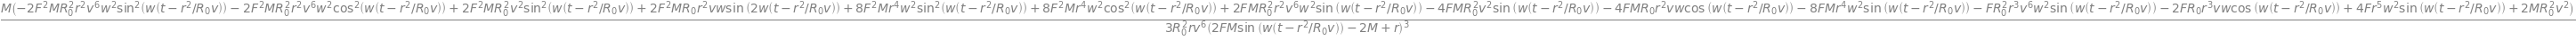

In [7]:
weyl[0,1,0,1]

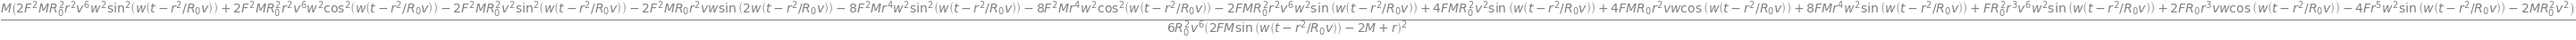

In [8]:
weyl[0,2,0,2]

In [9]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.9, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")




(t, r, theta, phi, F, M, R0, v, w)


TypeError: _lambdifygenerated() missing 3 required positional arguments: 'R0', 'v', and 'w'